<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.359283,-0.001357,43.357927,43.359255,-0.001329
1,0.0,1.0,21.891949,0.005169,31.897117,31.891935,0.005182
2,0.0,2.0,24.826168,0.008130,34.834298,34.826151,0.008148
3,0.0,3.0,70.779132,-0.000707,80.778425,80.779057,-0.000632
4,0.0,4.0,27.632601,0.019977,37.652578,37.632580,0.019998
...,...,...,...,...,...,...,...
249995,999.0,245.0,65.002780,0.001670,75.004450,75.003092,0.001358
249996,999.0,246.0,33.247891,0.009133,43.257024,43.248534,0.008490
249997,999.0,247.0,84.161467,0.000552,94.162019,94.161580,0.000439
249998,999.0,248.0,72.487390,0.003978,82.491368,82.487624,0.003743


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.359283,-0.001357,43.357927,43.359255,-0.001329
1,0.0,1.0,21.891949,0.005169,31.897117,31.891935,0.005182
2,0.0,2.0,24.826168,0.008130,34.834298,34.826151,0.008148
3,0.0,3.0,70.779132,-0.000707,80.778425,80.779057,-0.000632
4,0.0,4.0,27.632601,0.019977,37.652578,37.632580,0.019998
...,...,...,...,...,...,...,...
249995,999.0,245.0,65.002780,0.001670,75.004450,75.003092,0.001358
249996,999.0,246.0,33.247891,0.009133,43.257024,43.248534,0.008490
249997,999.0,247.0,84.161467,0.000552,94.162019,94.161580,0.000439
249998,999.0,248.0,72.487390,0.003978,82.491368,82.487624,0.003743


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    33.359283 -0.001357  43.357927  43.359255 -0.001329
      1.0    21.891949  0.005169  31.897117  31.891935  0.005182
      2.0    24.826168  0.008130  34.834298  34.826151  0.008148
      3.0    70.779132 -0.000707  80.778425  80.779057 -0.000632
      4.0    27.632601  0.019977  37.652578  37.632580  0.019998
...                ...       ...        ...        ...       ...
999.0 245.0  65.002780  0.001670  75.004450  75.003092  0.001358
      246.0  33.247891  0.009133  43.257024  43.248534  0.008490
      247.0  84.161467  0.000552  94.162019  94.161580  0.000439
      248.0  72.487390  0.003978  82.491368  82.487624  0.003743
      249.0  37.437649  0.005893  47.443542  47.438248  0.005294

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    33.359283 -0.001357  43.357927  43.359255 -0.001329
      1.0    21.891949  0.005169  31.897117  31.891935  0.005182
      2.0    24.826168  0.008130  34.834298  34.826151  0.008148
      3.0    70.779132 -0.000707  80.778425  80.779057 -0.000632
      4.0    27.632601  0.019977  37.652578  37.632580  0.019998
...                ...       ...        ...        ...       ...
999.0 245.0  65.002780  0.001670  75.004450  75.003092  0.001358
      246.0  33.247891  0.009133  43.257024  43.248534  0.008490
      247.0  84.161467  0.000552  94.162019  94.161580  0.000439
      248.0  72.487390  0.003978  82.491368  82.487624  0.003743
      249.0  37.437649  0.005893  47.443542  47.438248  0.005294

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.359283,-0.001357,43.357927,43.359255,-0.001329
1,0.0,1.0,21.891949,0.005169,31.897117,31.891935,0.005182
2,0.0,2.0,24.826168,0.008130,34.834298,34.826151,0.008148
3,0.0,3.0,70.779132,-0.000707,80.778425,80.779057,-0.000632
4,0.0,4.0,27.632601,0.019977,37.652578,37.632580,0.019998
...,...,...,...,...,...,...,...
249995,999.0,245.0,65.002780,0.001670,75.004450,75.003092,0.001358
249996,999.0,246.0,33.247891,0.009133,43.257024,43.248534,0.008490
249997,999.0,247.0,84.161467,0.000552,94.162019,94.161580,0.000439
249998,999.0,248.0,72.487390,0.003978,82.491368,82.487624,0.003743


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    33.359283 -0.001357  43.357927  43.359255 -0.001329
      1.0    21.891949  0.005169  31.897117  31.891935  0.005182
      2.0    24.826168  0.008130  34.834298  34.826151  0.008148
      3.0    70.779132 -0.000707  80.778425  80.779057 -0.000632
      4.0    27.632601  0.019977  37.652578  37.632580  0.019998
...                ...       ...        ...        ...       ...
999.0 245.0  65.002780  0.001670  75.004450  75.003092  0.001358
      246.0  33.247891  0.009133  43.257024  43.248534  0.008490
      247.0  84.161467  0.000552  94.162019  94.161580  0.000439
      248.0  72.487390  0.003978  82.491368  82.487624  0.003743
      249.0  37.437649  0.005893  47.443542  47.438248  0.005294

[250000 rows x 5 columns]

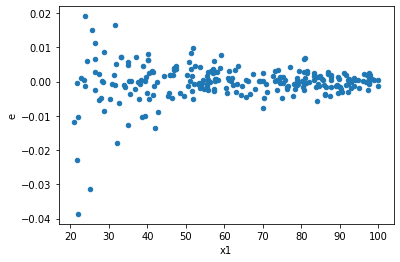

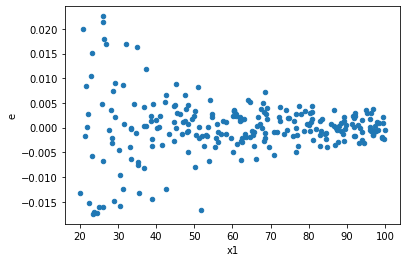

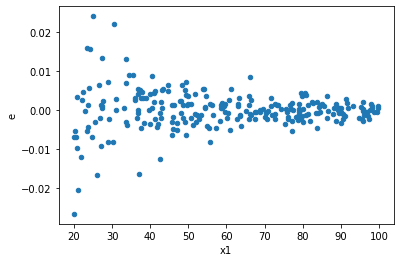

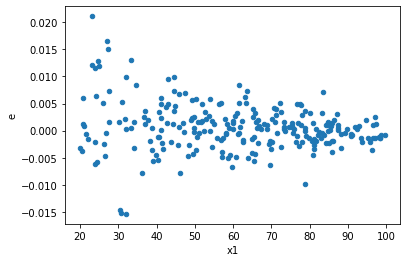

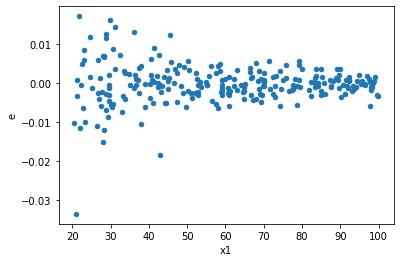

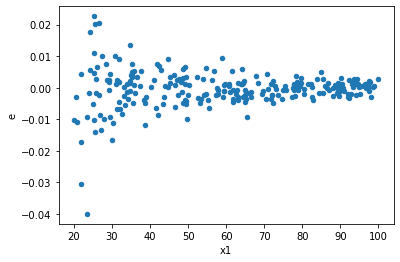

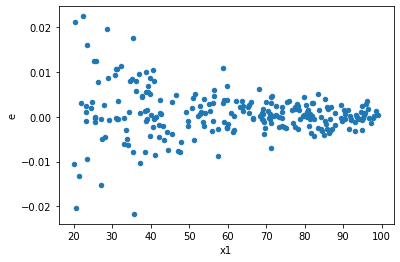

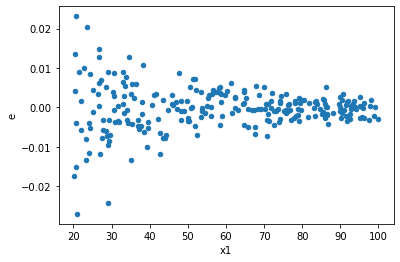

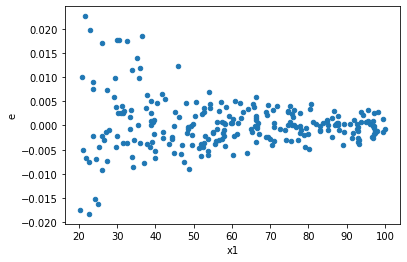

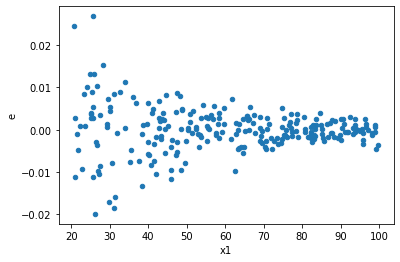

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,0.0054905447316159735,0.00035127919435119055,5.546004779410074e-05,3.5482746904160663e-06,0.06397893315182997,9.814243749706067e-34,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,0.007337321741121609,0.000452942343252009,7.411436102143039e-05,4.575175184363727e-06,0.0617312909577781,2.0514122398657433e-34,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,0.006719893489429947,0.00038032567738947447,6.78777120144439e-05,3.84167350898459e-06,0.05659697999495193,4.460252757057052e-36,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,0.008613082413406928,0.0004949508513889974,8.700083245865584e-05,4.999503549383812e-06,0.05746500818552115,8.749748048571518e-36,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,0.009937029764740453,0.0006355054907118085,0.00010037403802768134,6.419247380927359e-06,0.0639532642809194,9.64374169281895e-34,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,0.0077454719956082515,0.00037442279087667514,7.823709086472982e-05,3.7820483926936884e-06,0.048340861743348375,3.889702656094792e-39,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,0.005674935040316461,0.0003334915352122506,5.732257616481274e-05,3.368601365780309e-06,0.05876570090107209,2.3518593055771024e-35,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,0.004330491153167853,0.0004553533372508067,4.3742334880483365e-05,4.599528659099058e-06,0.10515050629250342,1.1895361830877551e-24,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,0.0090879578063675,0.00047553352300092505,9.179755359967171e-05,4.8033689192012636e-06,0.0523256746051067,1.3583377838817027e-37,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64